## Kmeans
- Kmeans is a clustering algorithm that tries to partition a set of points into K sets (clusters) such that the points in each cluster are close to each other.

In [7]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# get dataset: basketball players' game data
# col 1: assists_per_minute
# col 2: points_per_minute
X = [[0.0888, 0.5885],
     [0.1399, 0.8291],
     [0.0747, 0.4974],
     [0.0983, 0.5772],
     [0.1276, 0.5703],
     [0.1671, 0.5835],
     [0.1306, 0.5276],
     [0.1061, 0.5523],
     [0.2446, 0.4007],
     [0.1670, 0.4770],
     [0.2485, 0.4313],
     [0.1227, 0.4909],
     [0.1240, 0.5668],
     [0.1461, 0.5113],
     [0.2315, 0.3788],
     [0.0494, 0.5590],
     [0.1107, 0.4799],
     [0.1121, 0.5735],
     [0.1007, 0.6318],
     [0.2567, 0.4326],
     [0.1956, 0.4280]   
    ]

/opt/anaconda3/envs/opencv_pip_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


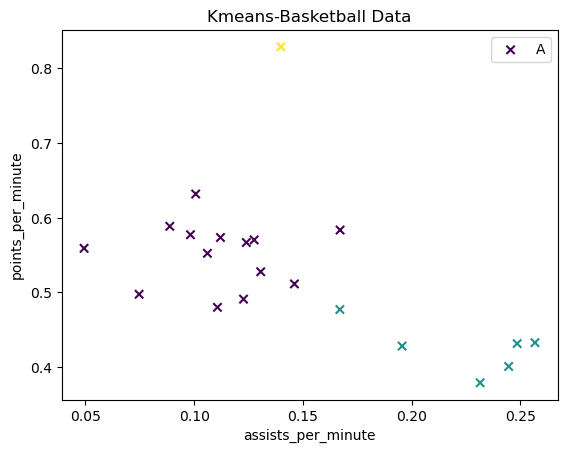

In [9]:
model = KMeans(n_clusters=3)
y_pred = model.fit_predict(X)

# visualization
x = [n[0] for n in X]
y = [n[1] for n in X]

plt.scatter(x, y, c=y_pred, marker='x')
plt.title("Kmeans-Basketball Data")
plt.xlabel("assists_per_minute")
plt.ylabel("points_per_minute")
 
plt.legend(["A","B","C"])
 
plt.show()

### Using Kmeans to cluster the image's pixels

In [12]:
import cv2
import ipywidgets
from ipywidgets import interact, IntSlider

In [16]:
img = cv2.imread('../lenna.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
one_dim_data = np.float32(img.reshape((-1, 3)))

def apply_kmeans(k):
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TermCriteria_MAX_ITER, 10, 0.1)
    flags = cv2.KMEANS_RANDOM_CENTERS
    _, labels, centers = cv2.kmeans(one_dim_data, k, None, criteria, 10, flags)

    centers = np.uint8(centers)
    res = centers[labels.flatten()]
    dst = res.reshape((img.shape))

    plt.figure(figsize=(10,8))
    plt.subplot(121), plt.imshow(img), plt.title('Original Image')
    plt.axis('off')
    plt.subplot(122), plt.imshow(dst), plt.title(f'Clustered Image K={k}')
    plt.axis('off')
    plt.show()

interact(apply_kmeans, k=IntSlider(min=2, max=64, step=2, value=2, description='Number of Clusters:'))

interactive(children=(IntSlider(value=2, description='Number of Clusters:', max=64, min=2, step=2), Output()),…

<function __main__.apply_kmeans(k)>

In [40]:
img = cv2.imread("../lenna.png", 0) # get gray img

# convert img to one dim
h, w = img.shape
one_dim_data = np.float32(img.reshape((h*w, 1)))

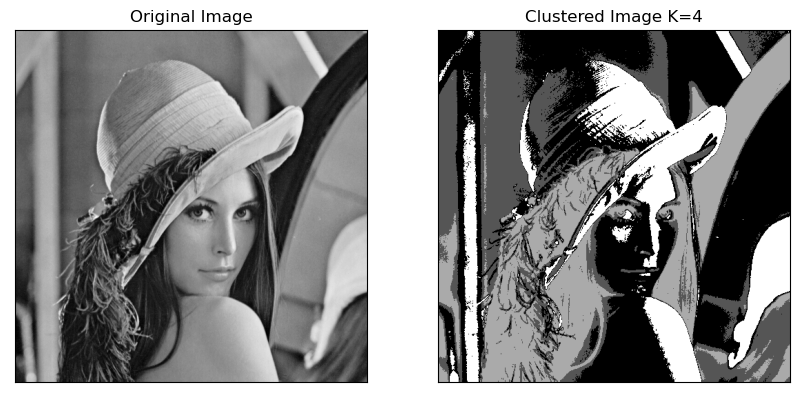

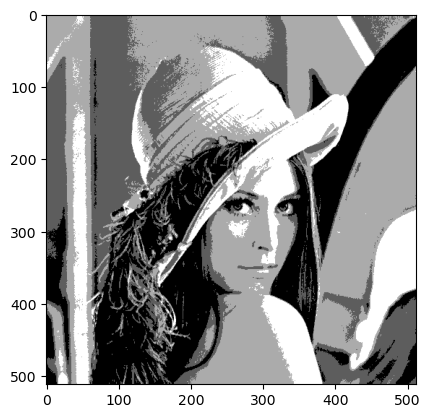

In [44]:
# criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TermCriteria_MAX_ITER, 10, 0.1)

flags = cv2.KMEANS_RANDOM_CENTERS

_, labels, centers = cv2.kmeans(one_dim_data, 4, None, criteria, 10, flags)

dst = labels.reshape(h, w)

plt.figure(figsize=(10, 8))
plt.subplot(121), plt.imshow(img, 'gray'), plt.title("Original Image")
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(dst, 'gray'), plt.title("Clustered Image K=4")
plt.xticks([]), plt.yticks([])
plt.show()

# assign the centers value to the corresponsive cluster.
centers = np.uint8(centers)
res = centers[labels.flatten()]
dst = res.reshape((img.shape))
plt.imshow(dst, 'gray')